<h2> Distribuciones de probabilidad de v.a. continuas. Versión general</h2>

Si $X$ es una v.a. continua, la forma en la que especificamos sus propiedades es a través de su <strong>función de distribución</strong> $F_X(t)=P(X\leq t)$. Esta función permite todo tipo de cálculos sobre las probabilidades asociadas a la variable. 

Es usual definir $F_X$ en términos de otra función: la <strong>densidad de probabilidad</strong> $f_X(x)$. Esto se hace del siguiente modo:
$$F_X(t)=P(X\leq t)=\int_{-\infty}^tf_X(x)dx $$

Las funciones $f_X$ tienen las siguientes propiedades:

* $0\leq f_X(x)\leq 1$ para todo $x\in\mathbb{R}$. <font color="brown">(Esto es análogo a la propiedad $p_i\geq 0$ de la Pmf en el caso de v.a. discretas)</font>

* $\int_{-\infty}^{\infty}f_X(x)dx=1$.  <font color="brown">(Esto es análogo a la propiedad $\sum_{i=1}^{\infty}p_i =1$ de la Pmf en el caso de v.a. discretas)</font>

Análogamente, las funciones $F_X$ tienen las siguientes propiedades:

* $F_X\geq 0$, $F_X$ es monótona creciente.
* $\lim_{t\to-\infty}F_X(t)=0$, $\lim_{t\to\infty}F_X(t)=1$.

Disponer de una función $f_X$ que satisface las condiciones anteriores equivale a definir una v.a. $X$ cuya función de distribución $F_X$ viene dada por $F_X(t)=P(X\leq t)=\int_{-\infty}^tf_X(x)dx$.  

La esperanza y la varianza de la v.a. continua $X$ vienen dadas por las expresiones:
$$\mu = E(X)=\int_{-\infty}^{\infty}xf_X(x)dx$$
$$\sigma_X^2=V(X)=E((X-\mu)^2)= \int_{-\infty}^{\infty}(x-\mu)^2f_X(x)dx$$





<h3> Cómo simular una v.a. continua arbitraria $X$ </h3> 
    
Vamos a crear un programa que simula la variable $X$ cuya función de distribución es $F_X$. Para ello, usamos los siguientes resultados:

<strong> Proposición 1</strong> Sea $X$ una v.a. cuya función de distribución $F_X$ es continua y estrictamente creciente en el rango de la v.a. Definimos $F_X^{-1}(u)=\inf \{x: F_X(x)\geq u\}$. Entonces:

* $F_X^{-1}(u)$ es exactamente el percentil-$u$ de la v.a. $X$. 

* $F_X(F_X^{-1}(u))=u=F_X^{-1}(F_X(u))$ pata todo $u\in [0,1]$.  

*  $U=F_X(X)\sim U([0,1])$ (i.e., la v.a. $U=F_X(X)$ sigue una distribución uniforme en $[0,1]$).

* Si $U\sim U([0,1])$, entonces  $Z=F_X^{-1}(U)\sim X$ (i.e., la v.a. $Z=F_X^{-1}(U)$ sigue la misma distribución que la v.a. $X$).
    
<strong> Demostración. </strong> 

En efecto, las dos primeras afirmaciones son claras. Con respecto a la tercera afirmación, un simple cálculo nos dice que 

$$F_U(t)=P(U\leq t)=P(F_X(X)\leq t)=P(X\leq F_X^{-1}(t))=F_X(F_X^{-1}(t))=t$$

y, por tanto, la v.a. $U=F_X(X)$ se distribuye uniformemente en $[0,1]$.

Finalmente, si $Z=F_X^{-1}(U)$, donde $U\sim U([0,1])$, entonces

$$P(Z\leq t)=P(F_X^{-1}(U)\leq t)=P(U\leq F_X(t))= F_X(t) =P(X\leq t)$$

Esto concluye la demostración. $\Box$

<font color="brown"> Una importante consecuencia de los cálculos anteriores es que gracias a las afirmaciones primera y cuarta de la proposición, sabemos que un método válido para la simulación muestras de una v.a. $X$ consiste en realizar los siguientes dos pasos: </font>
    
<font color="brown">    (a) Generar muestras de una v.a. uniforme (para esto existen multitud de algoritmos que funcionan razonablemente bien), y </font>
    
<font color="brown">    (b) Calcular los percentiles asociados a los valores que se acaban de obtener. Estos percentiles son las muestras de la v.a. $X$ que buscábamos. </font> 

<h2> Trabajando en Python con v.a. continuas generales </h2>
    
Veamos cómo se usa Python para estudiar las v.a. continuas cuando la función de densidad nos la dan explícitamente. 

In [35]:
import pandas as pd
import numpy as np
import random
from collections import Counter

### Antes de ejecutar esto, es necesario hacer 
## pip install empiricaldist 
## en Terminal
from empiricaldist import Pmf
from scipy.integrate import quad
import matplotlib.pyplot as plt

<strong> Ejemplo </strong> Considera la v.a $X$ cuya función de densidad es 
$$f_X(x)=\left\{\begin{array}{llll} \frac{x^2}{9} & x\in [0,3]\\
0 & \text{ x\not\in [0,3]}\end{array}\right.$$
* Definir $f_X$ con Python. Dibujar su gráfico. Comprobar que en efecto es una función densidad de probabilidad.
* Definir $F_X$. Calcular $P(1.5<X<2)$. 
* Calcular la media y la desviación típica de $X$
* Calcular los quartiles $Q_1,Q_2,Q_3$. (Definir una función que calcule los cuantiles y usarla para calcular $Q_1,Q_2,Q_3$. 
* ¿Cuáles serían los valores atípicos de la v.a. $X$?
* Haz un programa que simule la v.a. $X$. Calcula 10000 datos con ese programa y compara el histograma, media, varianza, etc de estos datos con los resultados de los apartados anteriores.

In [36]:
# Definimos f_X(x), que denotamos por f(x)
def f(x):
    if x <= 0:
        return 0
    elif x>3:
        return 0
    return x**2 / 9

# Para poder hacer representaciones gráficas, y para calcular integrales, vectorizamos f
def f_vec(val):
    result=[]
    for _ in val:
        result.append(f(_))
    return result

#f_vec = np.vectorize(f)

[f_vec([0,1,2,3,4]),[f(0),f(1),f(2),f(3),f(4)]]

[[0, 0.1111111111111111, 0.4444444444444444, 1.0, 0],
 [0, 0.1111111111111111, 0.4444444444444444, 1.0, 0]]

In [37]:


# Definimos F_X(x) (la denotamos por F(x)): 

def F(x):
    result, _ = quad(f, 0, x)  
    ## quad(f,0,x) da dos valores.
    ## El primero es la integral, el segundo una estimación del error. 
    ## Nos quedamos con el primero.
    return result

# Vectorizamos la función F(x) -para las gráficas.


F_vec=np.vectorize(F)

[F_vec([0,1,2,3,4]),[F(0),F(1),F(2),F(3),F(4)]]

[array([0.        , 0.03703704, 0.2962963 , 1.        , 1.        ]),
 [0.0, 0.037037037037037035, 0.2962962962962963, 1.0, 1.0]]

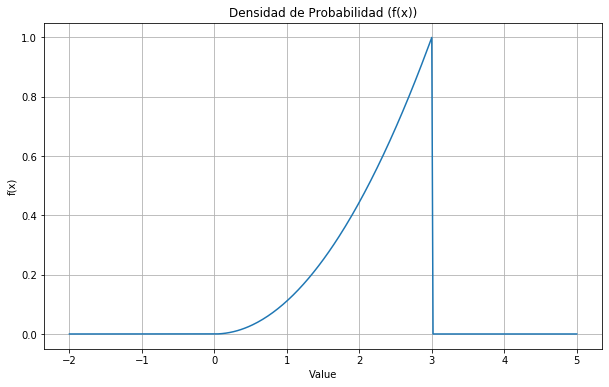

In [38]:
x_vals =np.linspace(-2, 5, 400)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vec(x_vals),  label='f(x)')
#plt.scatter(x_vals, f_vec(x_vals), color='r')
plt.title('Densidad de Probabilidad (f(x))')
plt.xlabel('Value')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

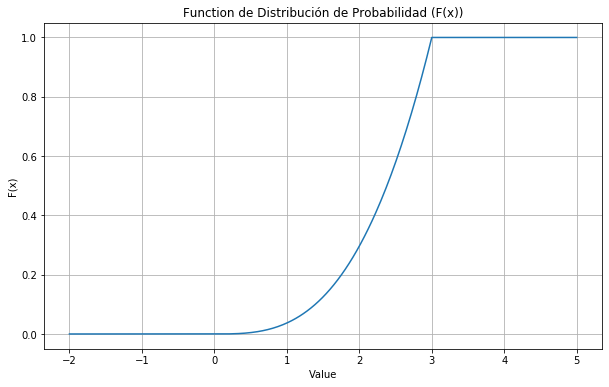

In [39]:
x_vals =np.linspace(-2, 5, 400)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, F_vec(x_vals),  label='F(x)')
#plt.scatter(x_vals, f_vec(x_vals), color='r')
plt.title('Function de Distribución de Probabilidad (F(x))')
plt.xlabel('Value')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()

El dibujo de $F_X$ nos confirma que hemos definido una función de distribución y, por tanto, que la función $f_X$ es una función densidad de probabilidad. 

* La probabilidad que nos piden es $P(1.5<X<2)=F_X(2)-F_X(1.5):


In [40]:
F(2)-F(1.5)

0.17129629629629628

Vamos a calcular $\mu=E(X)$, $\sigma_X=V(X)$, y $\sigma_X$:

In [41]:
# Esperanza:
mu,_=quad(lambda x:x*f(x),0,3)
mu

2.2499999999999996

In [42]:
# Varianza:
var,_=quad(lambda x:((x-mu)**2)*f(x),0,3)
var

0.33749999999999997

In [43]:
# Desviación típica
sigma=var**0.5
sigma

0.5809475019311126

Para calcular cuantiles (o percentiles) es necesario resolver ciertas ecuaciones, para lo cual necesitamos importat un paquete específico llamado brentq (hay otros, como fsolve, pero este es muy eficiente y robusto). Lo importamos: 

In [44]:
import numpy as np
from scipy.optimize import brentq 
# We can use brentq for root-finding

Por definición, $\alpha$ es el percentil-$p$ (donde $0<p<1$) si $$P(X\leq \alpha)=p.$$ Ahora bien, esto se reescribe como $F_X(\alpha)=p$ o, si se quiere, como $F_X(\alpha)-p=0$. Por tanto, el percentil-$p$ se obtiene de resolver la ecuación:
$$F_X(t)-p=0$$
Veamos cómo hacerlo con Python:

In [45]:
# Function to calculate the percentile
def percentile(p):
    per = brentq(lambda x: F(x) - p, 0, 3)  # Root-finding in the range [0, 3]
    return per

# Vectorizing the percentile function
percentile_vectorized = np.vectorize(percentile)

Calculemos, pues, los cuartiles:

In [46]:
cuartiles = percentile_vectorized([0.25, 0.5, 0.75])
print(cuartiles)

[1.88988157 2.38110158 2.72568089]


Vamos a crear un programa que simula la variable $X$. 


Para ello, necesitamos generar una v.a uniforme en [0,1] y luego tomar los percentiles correspondientes. 

En efecto, si 

In [47]:
# Generate 10,000 random numbers between 0 and 1
random_values = np.random.uniform(0, 1, 10000)

# Compute the percentiles for the random values
datos = percentile_vectorized(random_values)

In [48]:
np.histogram(datos, bins=30, range=None, density=False, weights=None)

(array([  9,  15,  15,  17,  21,  49,  63,  89,  99, 116, 139, 178, 169,
        219, 231, 270, 302, 383, 410, 412, 446, 531, 511, 607, 699, 702,
        749, 818, 853, 878]),
 array([0.16057734, 0.25521361, 0.34984988, 0.44448616, 0.53912243,
        0.6337587 , 0.72839498, 0.82303125, 0.91766752, 1.0123038 ,
        1.10694007, 1.20157634, 1.29621262, 1.39084889, 1.48548516,
        1.58012144, 1.67475771, 1.76939398, 1.86403026, 1.95866653,
        2.0533028 , 2.14793908, 2.24257535, 2.33721162, 2.4318479 ,
        2.52648417, 2.62112044, 2.71575672, 2.81039299, 2.90502926,
        2.99966554]))

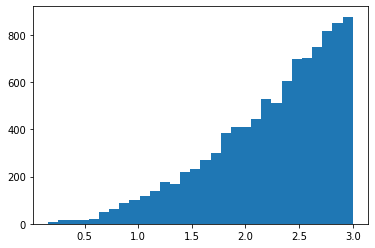

In [49]:
plt.hist(datos, bins=30, range=None, density=False, weights=None)
plt.show()

In [50]:
# Compare the theoretical and empirical mean, variance, and standard deviation
print(f"Empirical Mean: {np.mean(datos)}, Theoretical Mean: {mu}")
print(f"Empirical Variance: {np.var(datos)}, Theoretical Variance: {var}")
print(f"Empirical Standard Deviation: {np.std(datos)}, Theoretical Standard Deviation: {sigma}")

# Quantiles (25th, 50th, 75th percentiles)
Q = np.quantile(datos, [0.25, 0.5, 0.75])
print("Empirical Quantiles (25%, 50%, 75%):", Q)

# Theoretical percentiles
percentiles = np.array([percentile(0.25), percentile(0.5), percentile(0.75)])
print("Theoretical Percentiles (25%, 50%, 75%):", percentiles)

Empirical Mean: 2.2511051930698915, Theoretical Mean: 2.2499999999999996
Empirical Variance: 0.3324719154024956, Theoretical Variance: 0.33749999999999997
Empirical Standard Deviation: 0.5766037767848001, Theoretical Standard Deviation: 0.5809475019311126
Empirical Quantiles (25%, 50%, 75%): [1.89243589 2.38457157 2.72128503]
Theoretical Percentiles (25%, 50%, 75%): [1.88988157 2.38110158 2.72568089]


In [51]:
Q1=np.quantile(datos,0.25)
Q2=np.quantile(datos,0.5)
Q3=np.quantile(datos,0.75)
print([Q1,Q2,Q3])
print(cuartiles)

[1.892435891579475, 2.3845715724477285, 2.7212850293613178]
[1.88988157 2.38110158 2.72568089]


<h1> NUEVA COSA</h1>

In [52]:
values=[1,2,3]
probs=[3/10,3/10,4/10]
resultado = np.random.choice(values, size=140, p=probs)
print(resultado)

[1 1 2 2 2 2 1 2 2 3 2 1 1 1 1 1 3 1 1 1 3 1 3 1 3 1 3 1 3 3 2 3 1 1 1 3 1
 3 2 2 1 2 2 3 3 2 2 3 3 3 2 2 3 3 3 3 3 2 2 3 1 3 3 1 2 3 3 1 1 3 1 3 2 2
 1 3 1 1 1 2 2 3 3 3 1 3 3 1 3 3 1 1 3 2 3 3 1 2 1 1 3 2 2 3 1 2 3 1 2 1 1
 1 3 3 2 3 2 3 2 3 3 2 3 3 2 3 2 1 3 3 1 3 1 3 2 2 3 2 1 2]


In [53]:
coin = Pmf()
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,probs
heads,0.5
tails,0.5


In [54]:
die = Pmf.from_seq([1,2,3,4,5,6]) 
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [55]:
letters = Pmf.from_seq(list('mississippi is a long river of USA and Tom Sawyer loves it')) 
letters

,probs
,0.189655
A,0.017241
S,0.034483
T,0.017241
U,0.017241
a,0.051724
d,0.017241
e,0.051724
f,0.017241
g,0.017241


In [56]:
from scipy.stats import norm
N = norm()   # Normal Distribution

from scipy.stats import bernoulli
B = bernoulli(p=0.2)   # Bernoulli Distribution with p=0.2

from scipy.stats import binom
D = binom(p=0.1, n=50)   # Binomial Distribution with p=0.1, n=50

In [57]:
COIN = binom(n=2, p=0.5)

In [58]:
COIN.pmf(2)

0.25

In [59]:
COIN.rvs(50)

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 0, 1])

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
# Define the values and the probability distribution
val = np.arange(2, 13, 1)  # Sequence from 2 to 12
prob = np.array([1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36])

# Cumulative sum of the probability distribution
cumsum_prob = np.cumsum(prob)
print("Cumulative sum of probabilities:", cumsum_prob)

Cumulative sum of probabilities: [0.02777778 0.08333333 0.16666667 0.27777778 0.41666667 0.58333333
 0.72222222 0.83333333 0.91666667 0.97222222 1.        ]


In [62]:
# Define the function f(x) which computes the sum of probabilities for each value in val
def f(x):
    return np.sum(prob[val == x])

# Vectorize the function f for the entire val range
f_vec = np.vectorize(f)

In [63]:
# Define the function F(x) which computes the cumulative sum of probabilities up to x
def F(x):
    return np.sum(prob[val <= x])

# Vectorize the function F for the entire val range
F_vec = np.vectorize(F)

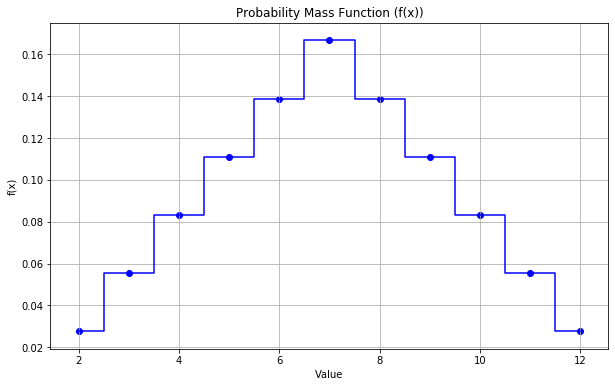

In [64]:
# Plot the function f (PMF)
plt.figure(figsize=(10, 6))
plt.step(val, f_vec(val), where='mid', label='f(x)', linestyle='-', color='b')
plt.scatter(val, f_vec(val), color='b')
plt.title('Probability Mass Function (f(x))')
plt.xlabel('Value')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

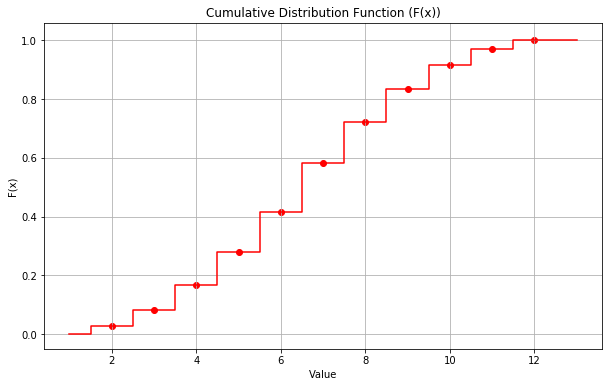

In [65]:
# Plot the function F (CDF)
x_vals = np.array([min(val)-1, *val, max(val)+1])  # Auxiliary variable for extended range
plt.figure(figsize=(10, 6))
plt.step(x_vals, F_vec(x_vals), where='mid', label='F(x)', linestyle='-', color='r')
plt.scatter(val, F_vec(val), color='r')
plt.title('Cumulative Distribution Function (F(x))')
plt.xlabel('Value')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()

In [66]:
# Function to compute the percentile (similar to the R version)
def percentile(p):
    for a in val:
        if F(a) >= p:    
            return a
percentile_vec = np.vectorize(percentile)

## Aquí es importante observar que val se presenta ordenado de menor a mayor 
## y se lee (con el for) de izquierda a derecha

In [67]:
percentile_vec([0.25,0.5,0.75])

array([5, 7, 9])

In [68]:
# Compute the mean of X (expected value)
media_X = np.sum(val * f_vec(val))
print("Media of Z:", media_X)

# Compute the variance of X
var_X = np.sum((val - media_X)**2 * f_vec(val))
print("Variance of Z:", var_X)

# Compute the standard deviation of X
dt_X = np.sqrt(var_X)
print("Standard deviation of Z:", dt_X)

Media of Z: 6.999999999999998
Variance of Z: 5.833333333333333
Standard deviation of Z: 2.41522945769824


In [69]:
# Generate 10000 samples from the distribution defined by prob
datos = np.random.choice(val, size=10000, p=prob, replace=True)

# Frequency table and its cumulative sum
tabla_frec = pd.Series(datos).value_counts(normalize=True).sort_index()
tabla_frec_acum = tabla_frec.cumsum()

print("Frequency table:", tabla_frec)
print("Cumulative frequency table:", tabla_frec_acum)

Frequency table: 2     0.0263
3     0.0572
4     0.0792
5     0.1132
6     0.1457
7     0.1623
8     0.1397
9     0.1066
10    0.0845
11    0.0550
12    0.0303
dtype: float64
Cumulative frequency table: 2     0.0263
3     0.0835
4     0.1627
5     0.2759
6     0.4216
7     0.5839
8     0.7236
9     0.8302
10    0.9147
11    0.9697
12    1.0000
dtype: float64


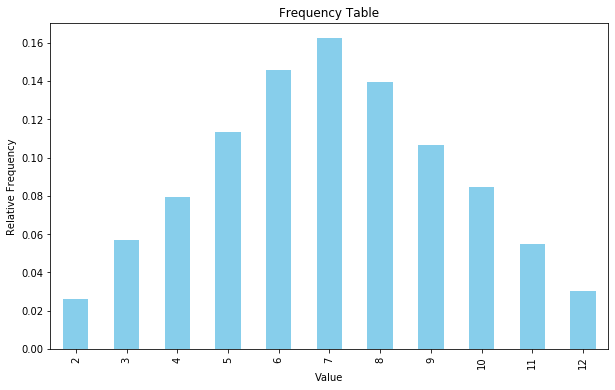

In [70]:
# Plot the frequency table
plt.figure(figsize=(10, 6))
tabla_frec.plot(kind='bar', color='skyblue')
plt.title('Frequency Table')
plt.xlabel('Value')
plt.ylabel('Relative Frequency')
plt.show()

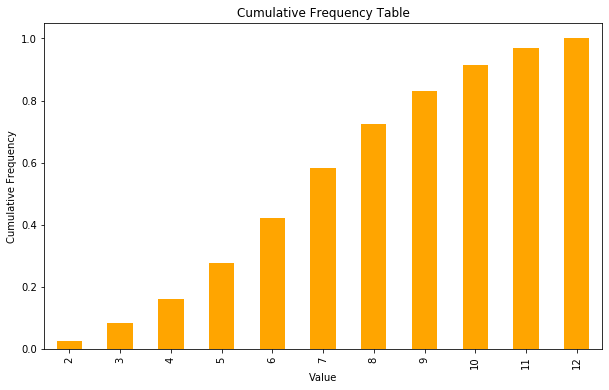

In [71]:
# Plot the cumulative frequency table
plt.figure(figsize=(10, 6))
tabla_frec_acum.plot(kind='bar', color='orange')
plt.title('Cumulative Frequency Table')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')
plt.show()

In [72]:
# Compare the theoretical and empirical mean, variance, and standard deviation
print(f"Empirical Mean: {np.mean(datos)}, Theoretical Mean: {media_Z}")
print(f"Empirical Variance: {np.var(datos)}, Theoretical Variance: {var_Z}")
print(f"Empirical Standard Deviation: {np.std(datos)}, Theoretical Standard Deviation: {dt_Z}")

# Quantiles (25th, 50th, 75th percentiles)
Q = np.quantile(datos, [0.25, 0.5, 0.75])
print("Empirical Quantiles (25%, 50%, 75%):", Q)

# Theoretical percentiles
percentiles = np.array([percentile(0.25), percentile(0.5), percentile(0.75)])
print("Theoretical Percentiles (25%, 50%, 75%):", percentiles)

NameError: name 'media_Z' is not defined